In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 150
plt.rcParams['savefig.dpi'] = 300
import warnings
warnings.filterwarnings('ignore')

# Read Data

## Dependent variable - group

In [2]:
gender_age = pd.read_csv('0_RawData/gender_age_train.csv')
gender_age

,device_id,gender,age,group
0,-8076087639492063270,M,35,M32-38
1,-2897161552818060146,M,35,M32-38
2,-8260683887967679142,M,35,M32-38
3,-4938849341048082022,M,30,M29-31
4,245133531816851882,M,30,M29-31
...,...,...,...,...
74640,4682031842235089751,M,30,M29-31
74641,-9178703742877135986,M,30,M29-31
74642,180946546684162312,M,20,M22-
74643,1390702386071991851,M,37,M32-38


In [24]:
gender_age.groupby('group').size()

group
F23-      5050
F24-26    4190
F27-28    3118
F29-32    4628
F33-42    5561
F43+      4194
M22-      7488
M23-26    9605
M27-28    5445
M29-31    7309
M32-38    9476
M39+      8581
dtype: int64

Text(0.5, 1.0, 'Demographic Groups')

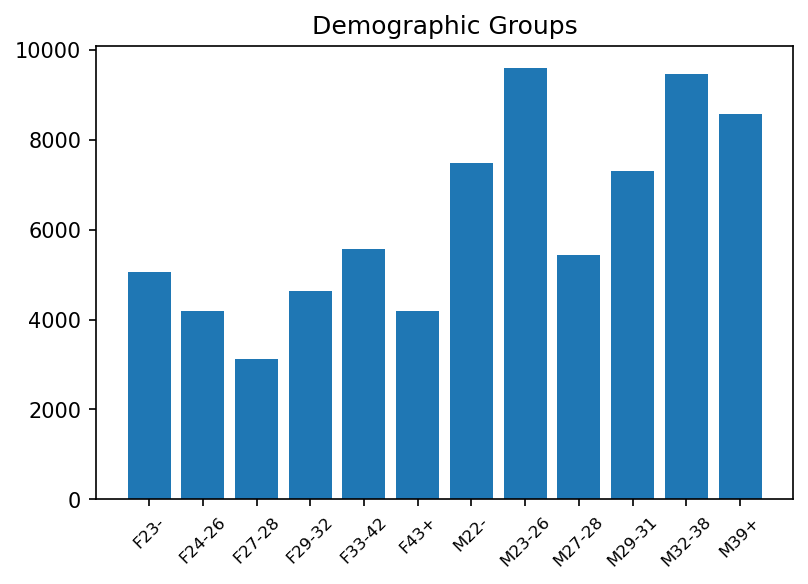

In [33]:
groupID = gender_age.groupby('group').size().index
groupNum = gender_age.groupby('group').size()

plt.bar(groupID, groupNum)
plt.xticks(size=8, rotation=45)
plt.yticks(size=10)
plt.title('Demographic Groups')

## Independent variable - events

In [3]:
events = pd.read_csv('0_RawData/events.csv')
events

,event_id,device_id,timestamp,longitude,latitude
0,1,29182687948017175,2016-05-01 00:55:25,121.38,31.24
1,2,-6401643145415154744,2016-05-01 00:54:12,103.65,30.97
2,3,-4833982096941402721,2016-05-01 00:08:05,106.60,29.70
3,4,-6815121365017318426,2016-05-01 00:06:40,104.27,23.28
4,5,-5373797595892518570,2016-05-01 00:07:18,115.88,28.66
...,...,...,...,...,...
3252945,3252946,-8995272658520685777,2016-05-07 23:14:17,0.00,0.00
3252946,3252947,6790350461641275817,2016-05-07 23:14:08,120.65,27.78
3252947,3252948,7111660304904287709,2016-05-07 23:35:33,121.40,31.18
3252948,3252949,2786044170600788970,2016-05-07 23:36:03,111.19,31.29


In [39]:
len(events.groupby('device_id').size())

60865

In [4]:
app_events = pd.read_csv('0_RawData/app_events.csv')
app_events

,event_id,app_id,is_installed,is_active
0,2,5927333115845830913,1,1
1,2,-5720078949152207372,1,0
2,2,-1633887856876571208,1,0
3,2,-653184325010919369,1,1
4,2,8693964245073640147,1,1
...,...,...,...,...
32473062,3252948,6607018907660377991,1,1
32473063,3252948,6602285879264922467,1,1
32473064,3252948,4348659952760821294,1,1
32473065,3252948,-995726944612374565,1,1


In [38]:
sum(app_events['is_installed'])

32473067

In [40]:
sum(app_events['is_active'])

12732996

## Independent Variable - apps

In [5]:
app_lables = pd.read_csv('0_RawData/app_labels.csv')
app_lables

,app_id,label_id
0,7324884708820027918,251
1,-4494216993218550286,251
2,6058196446775239644,406
3,6058196446775239644,407
4,8694625920731541625,406
...,...,...
459938,8899923330228547048,932
459939,8906927134640865376,932
459940,9180397886043162136,932
459941,9204453858293451002,932


In [6]:
label_categories = pd.read_csv('0_RawData/label_categories.csv')
label_categories

,label_id,category
0,1,NaN
1,2,game-game type
2,3,game-Game themes
3,4,game-Art Style
4,5,game-Leisure time
...,...,...
925,1017,Heritage Foundation
926,1018,Direct Banking
927,1019,Internet Securities
928,1020,Bank Credit Card


## Independent Variable - Brand

In [7]:
brand = pd.read_csv('0_RawData/phone_brand_device_model.csv')
brand

,device_id,phone_brand,device_model
0,-8890648629457979026,小米,红米
1,1277779817574759137,小米,MI 2
2,5137427614288105724,三星,Galaxy S4
3,3669464369358936369,SUGAR,时尚手机
4,-5019277647504317457,三星,Galaxy Note 2
...,...,...,...
187240,7979541072208733273,小米,MI 4
187241,-187404680852357705,小米,红米2
187242,-2718274279595622821,小米,MI 3
187243,3098391762071677791,vivo,X1


In [45]:
brand.groupby('phone_brand').size()

phone_brand
E人E本        1
E派         34
HTC      2682
LG        763
LOGO       58
        ...  
飞秒          2
首云          7
魅族      11853
鲜米          3
黑米         86
Length: 131, dtype: int64

In [52]:
brandNum_df = pd.DataFrame(brand.groupby('phone_brand').size(), columns=['Num'])
brandNum_df

,Num
phone_brand,
E人E本,1
E派,34
HTC,2682
LG,763
LOGO,58
...,...
飞秒,2
首云,7
魅族,11853


Text(0.5, 1.0, 'Histogram of Phone Brands')

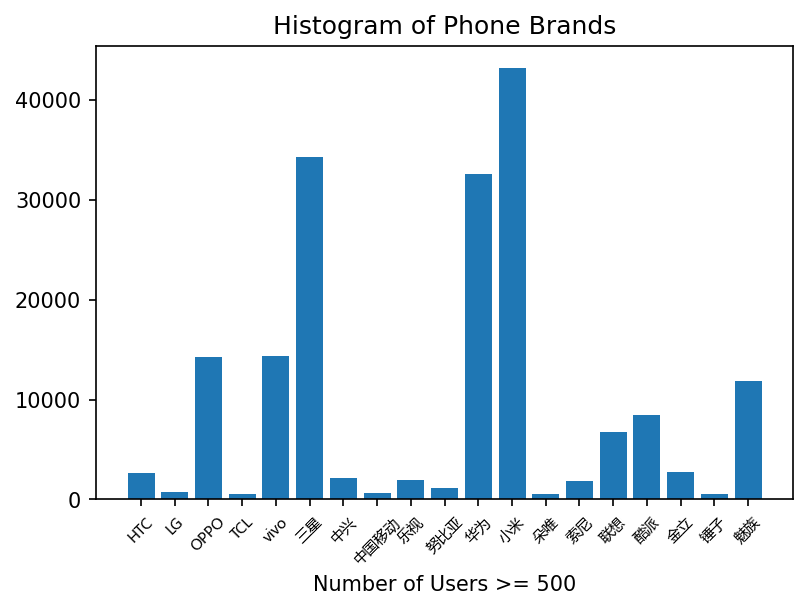

In [65]:
phoneID_500 = brandNum_df.loc[brandNum_df.Num >= 500].index
phoneNum_500 = brandNum_df.loc[brandNum_df.Num >= 500]['Num']

import matplotlib.font_manager as fm
myfont = fm.FontProperties(fname='C:\Windows\Fonts\msyh.ttc')
plt.bar(phoneID_500, phoneNum_500)
plt.xticks(size=7, rotation=45, fontproperties=myfont)
plt.xlabel('Number of Users >= 500')
plt.yticks(size=10)
plt.title('Histogram of Phone Brands')

# Data Processing

## Sampling of gender_age (SRS)

In [18]:
# 在gender_age中根据device_id进行随机抽样，只在events中有的device_id里随机抽
deviceID_events = pd.DataFrame({'device_id': events['device_id'].unique()})
gender_age_inEvents = pd.merge(gender_age, deviceID_events, how='inner', on='device_id')
gender_age_inEvents

,device_id,gender,age,group
0,-8260683887967679142,M,35,M32-38
1,7477216237379271436,F,37,F33-42
2,6352067998666467520,M,32,M32-38
3,1508636020748379883,F,28,F27-28
4,-6876541075223249434,M,75,M39+
...,...,...,...,...
23304,-5804749754315732086,M,33,M32-38
23305,-4229815843211107303,M,53,M39+
23306,5645813107043557722,F,51,F43+
23307,1390702386071991851,M,37,M32-38


Text(0.5, 1.0, 'Demographic Groups')

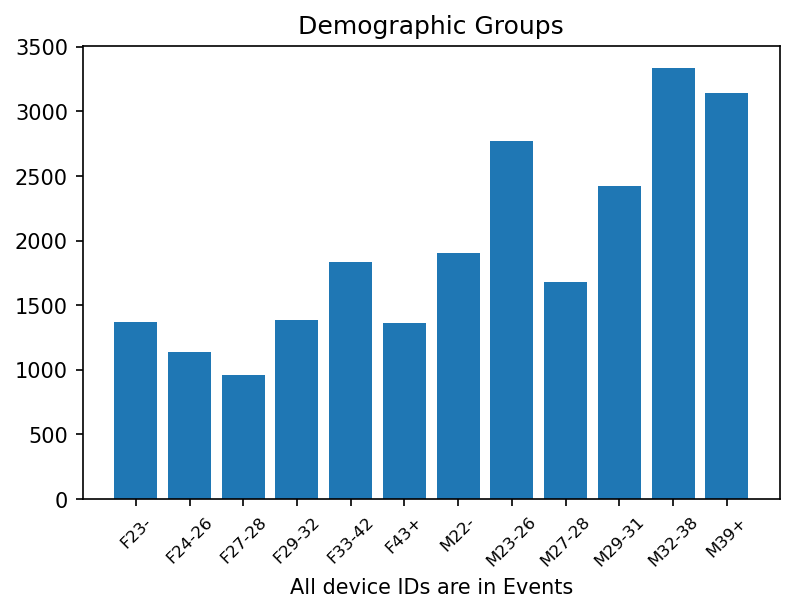

In [31]:
groupID_inEvents = gender_age_inEvents.groupby('group').size().index
groupNum_inEvents = gender_age_inEvents.groupby('group').size()

plt.bar(groupID_inEvents, groupNum_inEvents)
plt.xlabel('All device IDs are in Events')
plt.xticks(size=8, rotation=45)
plt.yticks(size=10)
plt.title('Demographic Groups')

In [29]:
# SRS, sample size = 15,000
np.random.seed(1234)
sampleID = np.random.choice(np.arange(len(gender_age_inEvents)), size=15000, replace=False)
gender_age_sample = gender_age_inEvents.iloc[np.sort(sampleID), :]
gender_age_sample.to_csv('1_ProcessedData/gender_age_raw.csv', index=False)

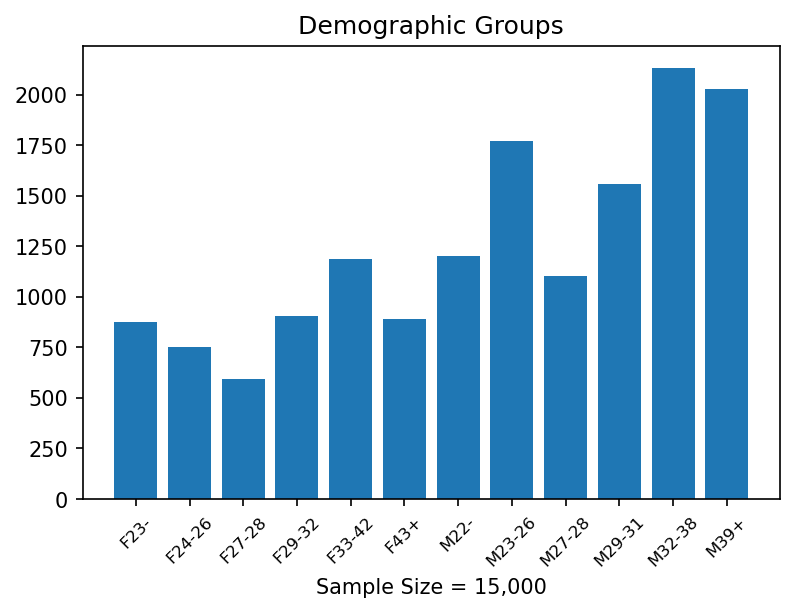

In [38]:
groupID_sample = gender_age_sample.groupby('group').size().index
groupNum_sample = gender_age_sample.groupby('group').size()

plt.bar(groupID_sample, groupNum_sample)
plt.xlabel('Sample Size = 15,000')
plt.xticks(size=8, rotation=45)
plt.yticks(size=10)
plt.title('Demographic Groups')
plt.savefig('2_figures/hist_gender_age_group.png')
plt.show()

In [40]:
# 保存抽样的编号
deviceID = np.sort(gender_age_sample['device_id'])

## events sample

In [42]:
events_by_deviceID = events.groupby(by='device_id')

In [46]:
%%time

events_sample = events_by_deviceID.get_group(deviceID[0])

for i in range(1, len(deviceID)):
    try:
        events_sample = events_sample.append(events_by_deviceID.get_group(deviceID[i]))
    except KeyError:
        continue

events_sample

Wall time: 5min 34s


,event_id,device_id,timestamp,longitude,latitude
11280,11281,-9222956879900151005,2016-05-07 11:36:04,0.00,0.00
12678,12679,-9222956879900151005,2016-05-07 12:18:35,113.24,23.19
49382,49383,-9222956879900151005,2016-05-07 15:44:45,0.00,0.00
131848,131849,-9222956879900151005,2016-05-07 12:06:35,113.24,23.19
205470,205471,-9222956879900151005,2016-05-06 15:36:46,113.24,23.19
...,...,...,...,...,...
2562829,2562830,9219842210460037807,2016-05-04 19:33:04,101.72,26.52
2599008,2599009,9219842210460037807,2016-05-01 22:40:57,0.00,0.00
2761229,2761230,9219842210460037807,2016-05-02 20:23:57,0.00,0.00
2890250,2890251,9219842210460037807,2016-05-01 21:14:48,0.00,0.00


In [47]:
len(events_sample['device_id'].unique())

15000

In [50]:
events_sample.sort_values('event_id').to_csv('1_ProcessedData/events_raw.csv', index=False)

In [51]:
events_sample['timestamp'].agg(['min', 'max'])

min    2016-04-30 23:52:26
max    2016-05-08 00:00:08
Name: timestamp, dtype: object

**2016年五一放假时间：**

+ 五一放假：4/30, 5/1, 5/2
+ 五一的后一个周末：5/7, 5/8
+ 工作日：5/3, 5/4, 5/5, 5/6
+ 划分为四类：1=休息日白天、2=休息日晚上、3=工作日白天、4=工作日晚上；白天为7am-7pm，晚上为7pm-7am

In [83]:
def timeRange(timestamp):
    holiday = [pd.Timestamp('2016-04-30'), pd.Timestamp('2016-05-01'), pd.Timestamp('2016-05-02'), pd.Timestamp('2016-05-07'), pd.Timestamp('2016-05-08')]
    
    if timestamp.date() in holiday:
        if timestamp.hour in range(7, 19):
            return 1 # 休息日白天
        else:
            return 2 # 休息日晚上
    else:
        if timestamp.hour in range(7, 19):
            return 3 # 工作日白天
        else:
            return 4 # 工作日晚上

In [84]:
events_sample['timestamp'] = pd.to_datetime(events_sample['timestamp'])
events_sample['timeRange'] = events_sample['timestamp'].apply(timeRange)
events_sample

,event_id,device_id,timestamp,longitude,latitude,timeRange
11280,11281,-9222956879900151005,2016-05-07 11:36:04,0.00,0.00,1
12678,12679,-9222956879900151005,2016-05-07 12:18:35,113.24,23.19,1
49382,49383,-9222956879900151005,2016-05-07 15:44:45,0.00,0.00,1
131848,131849,-9222956879900151005,2016-05-07 12:06:35,113.24,23.19,1
205470,205471,-9222956879900151005,2016-05-06 15:36:46,113.24,23.19,3
...,...,...,...,...,...,...
2562829,2562830,9219842210460037807,2016-05-04 19:33:04,101.72,26.52,4
2599008,2599009,9219842210460037807,2016-05-01 22:40:57,0.00,0.00,2
2761229,2761230,9219842210460037807,2016-05-02 20:23:57,0.00,0.00,2
2890250,2890251,9219842210460037807,2016-05-01 21:14:48,0.00,0.00,2


## app_events_sample

In [115]:
app_events_sample = pd.merge(events_sample, app_events, how='left', on='event_id').dropna()
app_events_sample

,event_id,device_id,timestamp,longitude,latitude,timeRange,app_id,is_installed,is_active
0,11281,-9222956879900151005,2016-05-07 11:36:04,0.0,0.0,1,-7.937803e+18,1.0,0.0
1,11281,-9222956879900151005,2016-05-07 11:36:04,0.0,0.0,1,5.861861e+18,1.0,0.0
2,11281,-9222956879900151005,2016-05-07 11:36:04,0.0,0.0,1,-1.633858e+18,1.0,0.0
3,11281,-9222956879900151005,2016-05-07 11:36:04,0.0,0.0,1,-5.061734e+17,1.0,0.0
4,11281,-9222956879900151005,2016-05-07 11:36:04,0.0,0.0,1,-1.200608e+18,1.0,0.0
...,...,...,...,...,...,...,...,...,...
8343064,2958969,9219842210460037807,2016-05-01 22:41:54,0.0,0.0,2,-1.633888e+18,1.0,1.0
8343065,2958969,9219842210460037807,2016-05-01 22:41:54,0.0,0.0,2,8.794585e+18,1.0,1.0
8343066,2958969,9219842210460037807,2016-05-01 22:41:54,0.0,0.0,2,6.196058e+18,1.0,1.0
8343067,2958969,9219842210460037807,2016-05-01 22:41:54,0.0,0.0,2,-3.925027e+18,1.0,1.0


In [116]:
app_events_sample.to_csv('1_ProcessedData/app_events_raw.csv', index=False)

In [117]:
len(app_events_sample['device_id'].unique())

14988

## app_events_label_categories

In [109]:
myCategories = pd.read_excel('0_RawData/label_categoriesProcessed.xlsx')
myCategories = myCategories.dropna()
myCategories

,label_id,category,myCategory
1,2,game-game type,game
2,3,game-Game themes,game
3,4,game-Art Style,game
4,5,game-Leisure time,game
5,6,game-Cutting things,game
...,...,...,...
925,1017,Heritage Foundation,finance
926,1018,Direct Banking,finance
927,1019,Internet Securities,finance
928,1020,Bank Credit Card,finance


In [110]:
myCategories.groupby('myCategory').size()

myCategory
beauty            16
business           4
education         45
entertainment     79
finance          103
game             158
health            23
life             125
news               9
shopping         122
social            12
sports            12
tools             38
travel           103
dtype: int64

In [119]:
app_events_categories = pd.merge(app_events_sample, app_lables, how='left', on='app_id')
app_events_categories = pd.merge(app_events_categories, myCategories, how='left', on='label_id')
app_events_categories

,event_id,device_id,timestamp,longitude,latitude,timeRange,app_id,is_installed,is_active,label_id,category,myCategory
0,11281,-9222956879900151005,2016-05-07 11:36:04,0.0,0.0,1,-7.937803e+18,1.0,0.0,NaN,NaN,NaN
1,11281,-9222956879900151005,2016-05-07 11:36:04,0.0,0.0,1,5.861861e+18,1.0,0.0,NaN,NaN,NaN
2,11281,-9222956879900151005,2016-05-07 11:36:04,0.0,0.0,1,-1.633858e+18,1.0,0.0,NaN,NaN,NaN
3,11281,-9222956879900151005,2016-05-07 11:36:04,0.0,0.0,1,-5.061734e+17,1.0,0.0,NaN,NaN,NaN
4,11281,-9222956879900151005,2016-05-07 11:36:04,0.0,0.0,1,-1.200608e+18,1.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
8235082,2958969,9219842210460037807,2016-05-01 22:41:54,0.0,0.0,2,-1.633888e+18,1.0,1.0,NaN,NaN,NaN
8235083,2958969,9219842210460037807,2016-05-01 22:41:54,0.0,0.0,2,8.794585e+18,1.0,1.0,NaN,NaN,NaN
8235084,2958969,9219842210460037807,2016-05-01 22:41:54,0.0,0.0,2,6.196058e+18,1.0,1.0,NaN,NaN,NaN
8235085,2958969,9219842210460037807,2016-05-01 22:41:54,0.0,0.0,2,-3.925027e+18,1.0,1.0,NaN,NaN,NaN


In [120]:
app_events_categories_dropna = app_events_categories.dropna()
app_events_categories_dropna

,event_id,device_id,timestamp,longitude,latitude,timeRange,app_id,is_installed,is_active,label_id,category,myCategory
4149,520501,-9217193238265898015,2016-05-06 19:27:27,0.0,0.0,4,-1.771591e+16,1.0,0.0,704.0,Property Industry 2.0,finance
4150,520501,-9217193238265898015,2016-05-06 19:27:27,0.0,0.0,4,-1.771591e+16,1.0,0.0,548.0,Industry tag,game
4151,520501,-9217193238265898015,2016-05-06 19:27:27,0.0,0.0,4,-1.771591e+16,1.0,0.0,163.0,Technology Information,news
7624,162815,-9201434269962947628,2016-05-05 02:49:22,0.0,0.0,4,-4.986197e+15,1.0,0.0,704.0,Property Industry 2.0,finance
7625,162815,-9201434269962947628,2016-05-05 02:49:22,0.0,0.0,4,-4.986197e+15,1.0,0.0,548.0,Industry tag,game
...,...,...,...,...,...,...,...,...,...,...,...,...
8234695,3222607,9219164468944552013,2016-05-03 04:36:04,0.0,0.0,4,-4.986140e+15,1.0,1.0,783.0,High risk,finance
8234696,3222607,9219164468944552013,2016-05-03 04:36:04,0.0,0.0,4,-4.986140e+15,1.0,1.0,252.0,Wealth Management,finance
8234697,3222607,9219164468944552013,2016-05-03 04:36:04,0.0,0.0,4,-4.986140e+15,1.0,1.0,256.0,Securities,finance
8234698,3222607,9219164468944552013,2016-05-03 04:36:04,0.0,0.0,4,-4.986140e+15,1.0,1.0,263.0,Debit and credit,finance


In [121]:
len(app_events_categories_dropna['device_id'].unique())

2836